<a href="https://colab.research.google.com/github/Thuan20146215/AI/blob/main/class_Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array


In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ClassImg/Train', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 721 images belonging to 12 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ClassImg/Test', 
                                                
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')

Found 12 images belonging to 12 classes.


TẠO **MODEL**

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

In [24]:
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 40, 32)        9248      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 20, 64)        36928     
                                                      

In [25]:
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])


In [26]:
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)


Epoch 1/80


<ipython-input-26-bfd2b33bb0cd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set),


23/23 [==============================] - 135s 6s/step - loss: 2.4727 - accuracy: 0.1040 - val_loss: 2.3955 - val_accuracy: 0.1667
Epoch 2/80
23/23 [==============================] - 5s 227ms/step - loss: 1.5097 - accuracy: 0.4771 - val_loss: 2.3196 - val_accuracy: 0.5000
Epoch 3/80
23/23 [==============================] - 6s 265ms/step - loss: 0.4214 - accuracy: 0.8544 - val_loss: 1.0527 - val_accuracy: 0.7500
Epoch 4/80
23/23 [==============================] - 5s 224ms/step - loss: 0.2227 - accuracy: 0.9390 - val_loss: 0.9020 - val_accuracy: 0.8333
Epoch 5/80
23/23 [==============================] - 6s 278ms/step - loss: 0.1683 - accuracy: 0.9598 - val_loss: 0.2863 - val_accuracy: 0.8333
Epoch 6/80
23/23 [==============================] - 5s 225ms/step - loss: 0.1376 - accuracy: 0.9639 - val_loss: 0.5934 - val_accuracy: 0.8333
Epoch 7/80
23/23 [==============================] - 5s 229ms/step - loss: 0.0418 - accuracy: 0.9889 - val_loss: 0.7168 - val_accuracy: 0.9167
Epoch 8/80
23/23 [

In [27]:
model.evaluate(test_set)

1/1 [==============================] - 0s 73ms/step - loss: 1.5455 - accuracy: 0.8333


[1.5455137491226196, 0.8333333134651184]

In [28]:
y_pred = model.predict_generator(test_set)
y_pred_class = y_pred > 0.5
y_pred_class

<ipython-input-28-467eccc537b7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[False, False, False,  True, False, False, False, False, False,
        False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False],
       [False,  True, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False],
       [False, False,  True, False, False, False, False, False, False,
        False, False

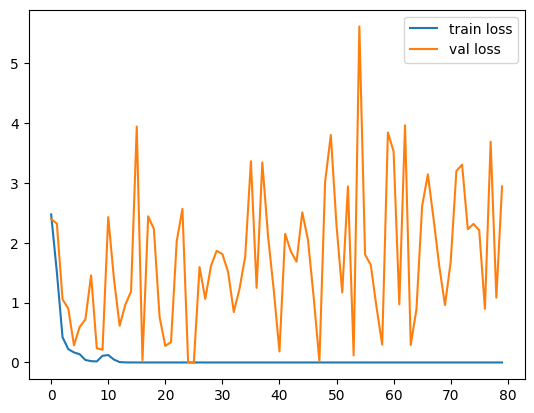

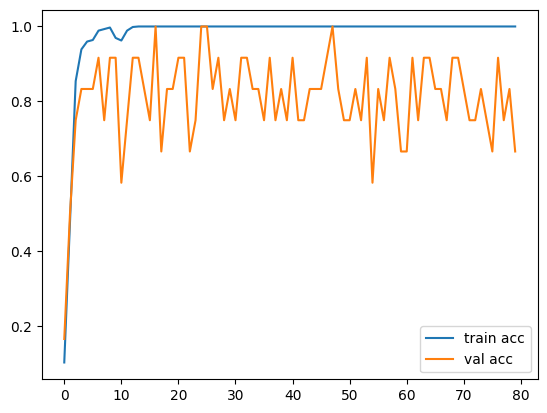

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('accval_acc')

In [31]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/ClassImg/model_inception.h5')

In [37]:
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/ClassImg/model_inception.h5')


**RUN TEST**

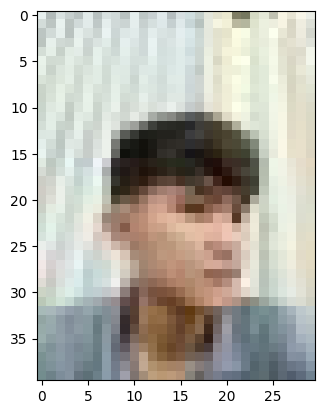

In [38]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/ClassImg/run/r5.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)

In [46]:
training_set.class_indices

{'CAO_TAN_PHI': 0,
 'CHIU_SANG_HUNG': 1,
 'DOAN_THANH_NAM': 2,
 'DO_NGOC_HIEU': 3,
 'NGUYEN_BAO_CHUONG': 4,
 'NGUYEN_LAM_TRUONG': 5,
 'NGUYEN_LE_PHONG': 6,
 'NGUYEN_MINH_TRI': 7,
 'NGUYEN_PHI_THANG': 8,
 'TRAN_HAO_DONG': 9,
 'VO_HUYNH_DUY_THANH': 10,
 'VU_DUC_BINH': 11}

Chọn ảnh : r16
1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Thanh
Chọn ảnh : r11
1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Đông
Chọn ảnh : r12
1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Phong


KeyboardInterrupt: ignored

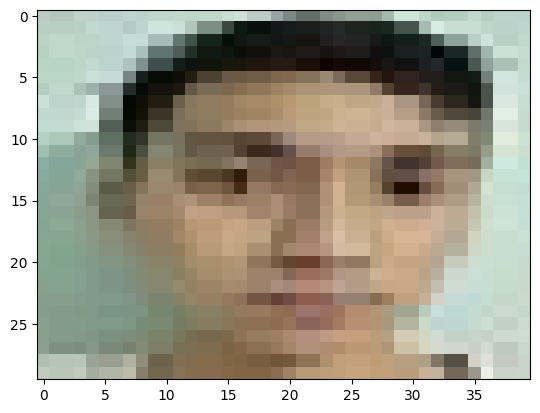

In [43]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' ảnh : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/ClassImg/run/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<12):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c==11) :
         c=12
     if c == 0:
       prediction = 'Phi'
     elif c == 1:
       prediction = 'Hùng'
     elif c == 2:
       prediction = 'Nam'
     elif c == 3:
       prediction = 'Hiếu'
     elif c == 4:
       prediction = 'Chương'
     elif c==5:
       prediction ='Trường'
     elif c == 6:
       prediction = 'Phong'
     elif c == 7:
       prediction = 'Trí'
     elif c == 8:
       prediction = 'Thắng'
     elif c==9:
       prediction ='Đông'
     elif c==10:
       prediction ='Thanh'
     elif c==11:
       prediction ='Bình'  
           
     print(prediction)
   except:
      print('Không tìm thấy ảnh có tên tương ứng '  )